In [1]:
#import numpy as np
from numpy import*    #np.を省略できるが、関数名の衝突に注意

In [2]:
A = array([[1.0,2.0,0.0], [-1.0,3.0,2.0], [0.0,-1.0,1.0]])
print (A)

[[ 1.  2.  0.]
 [-1.  3.  2.]
 [ 0. -1.  1.]]


In [22]:
#一次元arrayによる表現
a=array([1.0,2.0,3.0])
print(a)
#二次元arrayによる表現
b=array([[1.0,2.0,3.0]])
print(b)
print(b.T)

[ 1.  2.  3.]
[[ 1.  2.  3.]]
[[ 1.]
 [ 2.]
 [ 3.]]


## ベクトル演算

In [3]:
#リスト同様、インデックスで要素変更、スライスできる
#別名をつけたり、複製するのも同じ
a= array([0.0,1.0,2.0])
a[1]=3.0
print(a)

[ 0.  3.  2.]


In [4]:
a = zeros(3)
b = ones(3)
print(a,b)

[ 0.  0.  0.] [ 1.  1.  1.]


In [9]:
a = arange(1.0,10.0,4.0)    #幅を指定
b = linspace(1.0,10.0,4)    #要素数を指定
c = arange(3)    #[0,1,..,n-1]
print(a,b,c)

[ 1.  5.  9.] [  1.   4.   7.  10.] [0 1 2]


In [12]:
a+c

array([  1.,   6.,  11.])

In [13]:
a+1.0

array([  2.,   6.,  10.])

In [14]:
a*c    #要素同士の掛け算

array([  0.,   5.,  18.])

In [15]:
2*a

array([  2.,  10.,  18.])

In [16]:
#要素ごとに適用される関数
absolute(c-a)
#exp(a)
#sqrt(a)
#sin(a)

array([ 1.,  4.,  7.])

In [17]:
#内積
vdot(a,c)

23.0

In [18]:
#外積
outer(a,c)

array([[  0.,   1.,   2.],
       [  0.,   5.,  10.],
       [  0.,   9.,  18.]])

In [21]:
#ノルム
linalg.norm(a)

10.344080432788601

## 行列演算

In [25]:
A = array([[1.0,2.0], [3.0,4.0]])
print(A[0,0])    #要素指定
print(A[:,0])    #列ベクトルを取り出す
print(A[1,:])    #行ベクトルを取り出す

1.0
[ 1.  3.]
[ 3.  4.]


In [28]:
A = array([[1.0,2.0], [-2.0,1.0]])
B = array([[2.0,-1.0], [2.0,1.0]])
print(A+B)
print(A+1)

[[ 3.  1.]
 [ 0.  2.]]
[[ 2.  3.]
 [-1.  2.]]


In [29]:
print(2*A)    #スカラー倍
print(dot(A,B))    #行列積
print(A*B)    #要素積

[[ 2.  4.]
 [-4.  2.]]
[[ 6.  1.]
 [-2.  3.]]
[[ 2. -2.]
 [-4.  1.]]


In [31]:
#行数の変更
print(linspace(0.0,11.0,12).reshape(3,4))    #3*4
print(A.reshape(4))    #2*2→四次元ベクトル

[[  0.   1.   2.   3.]
 [  4.   5.   6.   7.]
 [  8.   9.  10.  11.]]
[ 1.  2. -2.  1.]


In [33]:
print(eye(3))    #単位行列
print(zeros((2,2)))    #零行列

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[ 0.  0.]
 [ 0.  0.]]


In [35]:
#連結
C = hstack((A,B))
D = vstack((A,B))
print(C)
print(D)

[[ 1.  2.  2. -1.]
 [-2.  1.  2.  1.]]
[[ 1.  2.]
 [-2.  1.]
 [ 2. -1.]
 [ 2.  1.]]


In [36]:
print(linalg.inv(A))    #逆行列
print(linalg.det(A))    #行列式

[[ 0.2 -0.4]
 [ 0.4  0.2]]
5.0


In [39]:
A = array([[1.0,2.0], [3.0,4.0]])
lmd,V = linalg.eig(A)
print(lmd)    #固有値
print(V)    #各列が固有ベクトル

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [40]:
#行列とベクトルの積
b = array([-1.0,2.0])
dot(A,b)

array([ 3.,  5.])

In [43]:
#連立一次方程式 Ax=b を解く
A = array([[-1.0,1.0,1.0], [2.0,-1.0,1.0], [1.0,0.0,-1.0]])
b = array([0.0,-1.0,2.0])
x = linalg.solve(A,b)
print(x)
#dot(linalg.inv(A), b)    x=A^(-1) b

[ 1.  2. -1.]


In [44]:
#乱数生成
print(random.random(3))    #0-1の一様乱数
print(random.randn(3))    #平均0,標準偏差1の標準正規分布に従う乱数
print(random.choice(10,5))    #0-(n-1)までの整数からランダムに選択

[ 0.92158622  0.0176264   0.61681393]
[-1.30612873 -0.36200969  0.57298918]
[7 9 1 3 1]


## 常微分方程式の数値解法

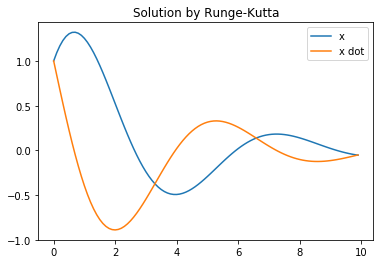

In [3]:
#減衰振動
from numpy import*
from pylab import*
%matplotlib inline

gam=0.3
ome2=1.0
dlt=0.1

T = arange(0.0,10.0,dlt)
N = T.shape[0]
X = zeros((N,2))

X[0,:] =[1.0,1.0]
A = array([[0.0,1.0],[-ome2,-2.0*gam]])

for n in range(N-1):
    k1=dot(A,X[n,:])
    k2=dot(A,X[n,:]+0.5*dlt*k1)
    k3=dot(A,X[n,:]+0.5*dlt*k2)
    k4=dot(A,X[n,:]+dlt*k3)
    X[n+1,:] = X[n,:]+dlt/6*(k1+2*k2+2*k3+k4)
    
plot(T,X[:,0])
plot(T,X[:,1])
legend(["x","x dot"])
title("Solution by Runge-Kutta")
show()

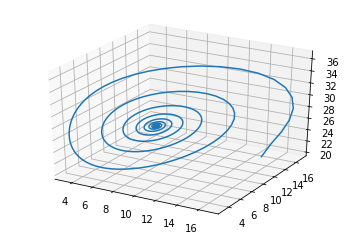

In [11]:
#Lorenz方程式
from numpy import*
from pylab import*
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

s=100.0
b=8.0/3.0
r=28.0
dt=0.01

T=arange(0.0,100.0,dt)
N=T.shape[0]
X=zeros((N,3))
X[0,:]=array([15.0,15.0,20.0])

def deriv_lorenz(x):
    dx=s*(x[1]-x[0])
    dy=x[0]*(r-x[2])-x[1]
    dz=x[0]*x[1]-b*x[2]
    dxdydz=array([dx,dy,dz])
    return dxdydz
    
for i in range(N-1):
    k1=deriv_lorenz(X[i,:])
    k2=deriv_lorenz(X[i,:]+0.5*dt*k1)
    k3=deriv_lorenz(X[i,:]+0.5*dt*k2)
    k4=deriv_lorenz(X[i,:]+dt*k3)
    X[i+1,:] = X[i,:]+dt/6*(k1+2*k2+2*k3+k4)
    
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(X[:,0],X[:,1],X[:,2])
plt.show()

## 最小二乗法